In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#Imports
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

#for scalability of numpy and pandas
import dask.array as da
import dask.dataframe as dd



In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
raw_df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos

print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



**Highly imbalanced Datase, as we can see less than 1% is positive**

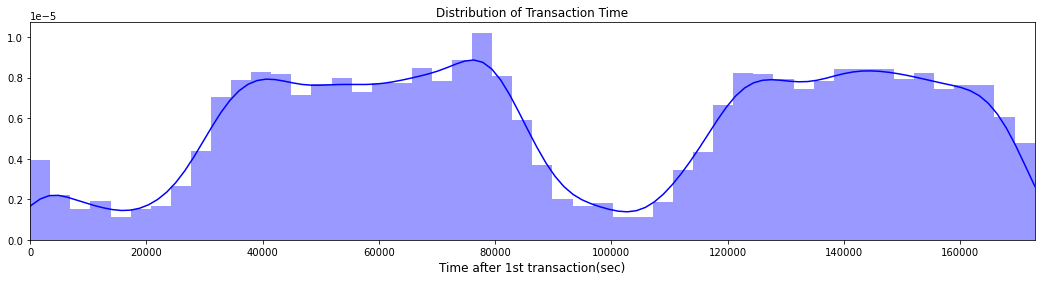

In [7]:
fig, ax = plt.subplots(figsize=(18,4))

amount_val = raw_df['Amount'].values
time_val = raw_df['Time'].values

sns.distplot(time_val, ax=ax, color='b')
ax.set_title('Distribution of Transaction Time', fontsize=12)
ax.set_xlim([min(time_val), max(time_val)])
ax.set_xlabel('Time after 1st transaction(sec)', fontsize=12);


plt.show()

**This time distribution does not give much information so let's convert the time into hours of the day**

In [8]:
cleaned_df = raw_df.copy()

cleaned_df['Time'] = ((cleaned_df['Time']/3600)%24).sort_values(ascending=False)

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Log_amount'] = np.log(cleaned_df['Amount']+eps)

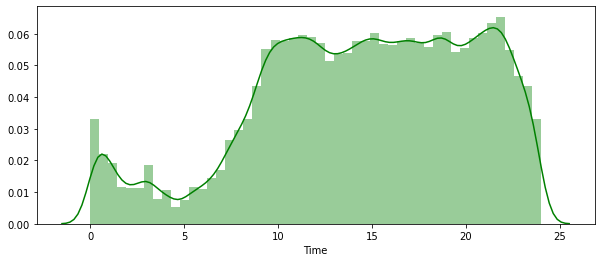

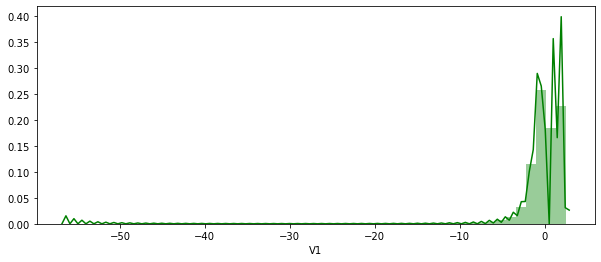

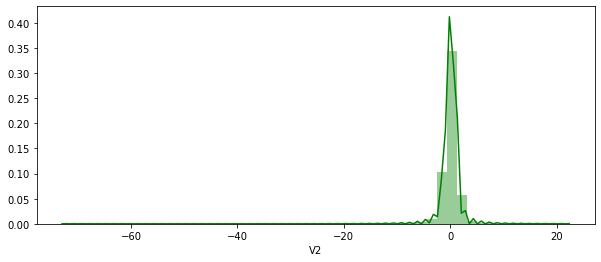

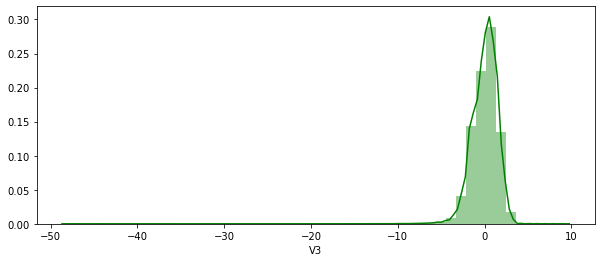

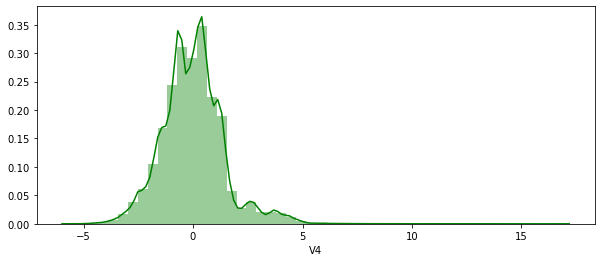

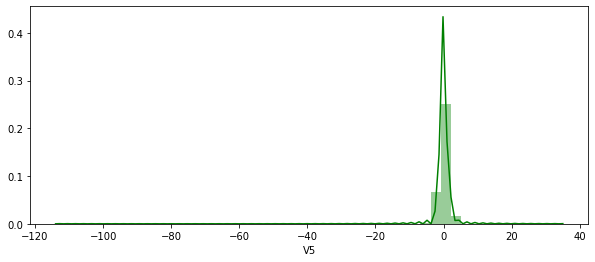

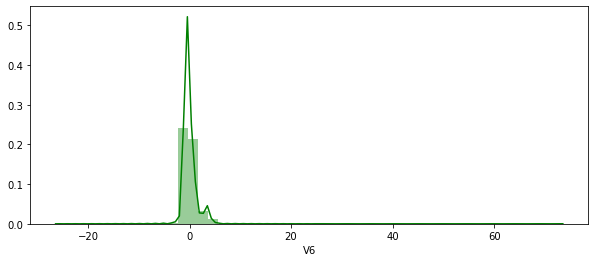

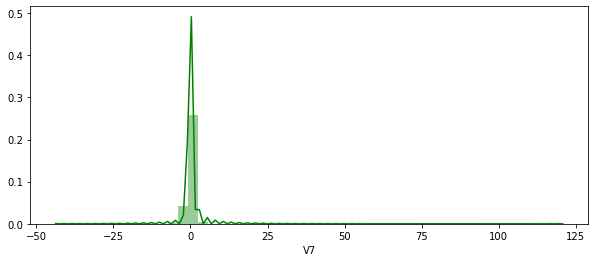

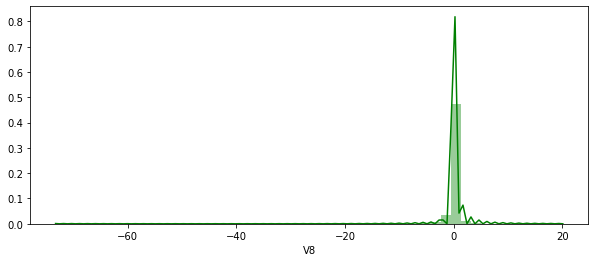

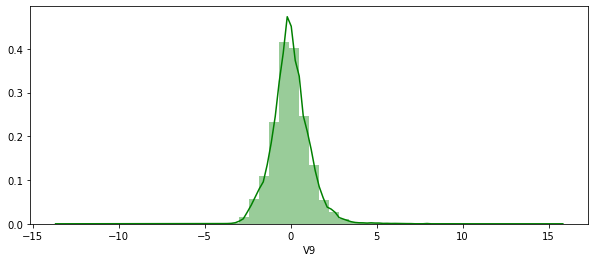

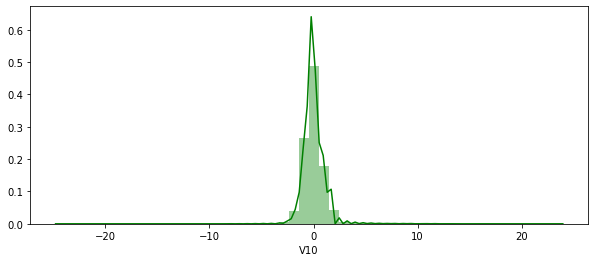

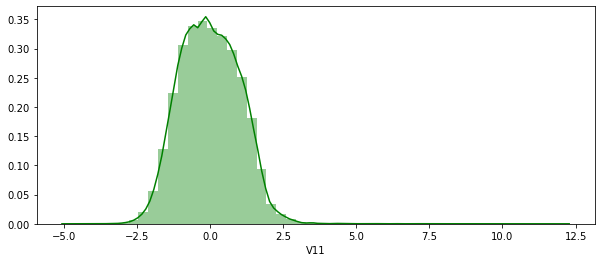

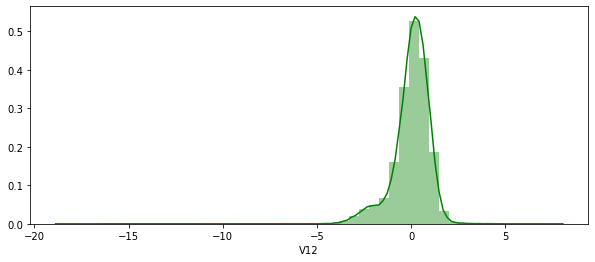

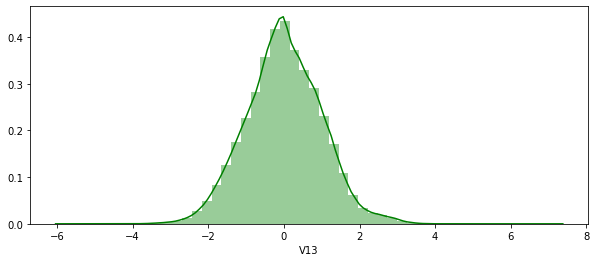

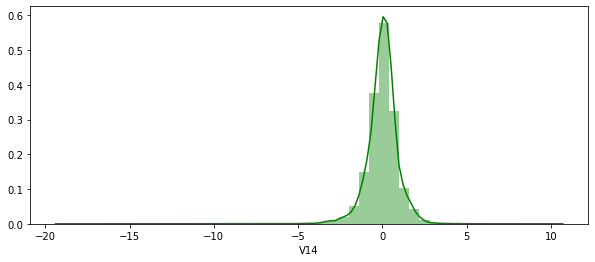

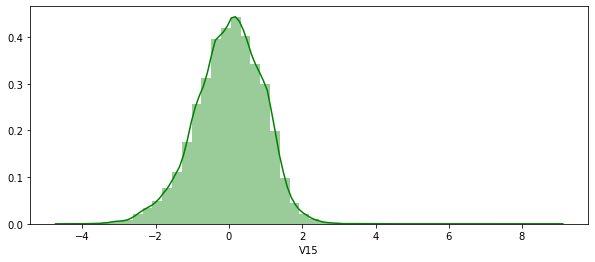

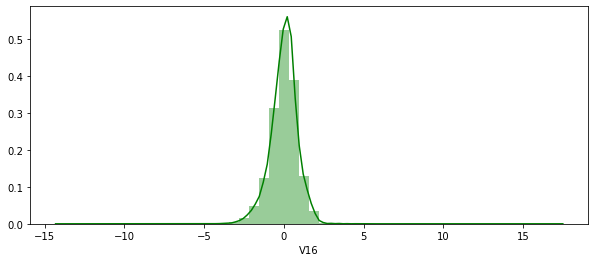

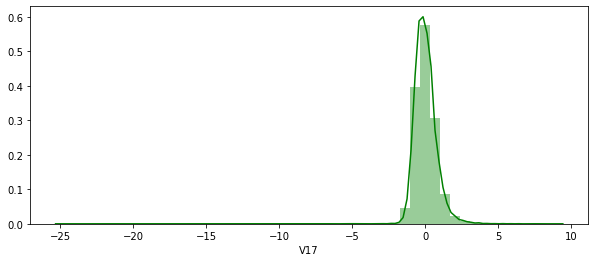

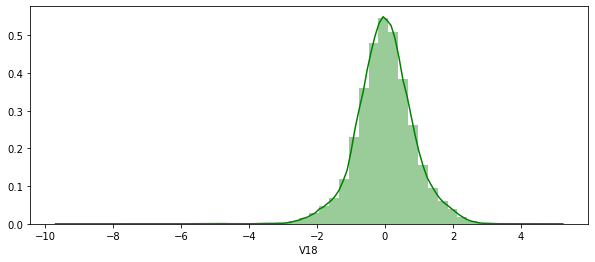

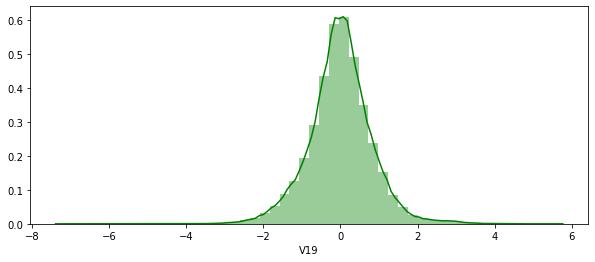

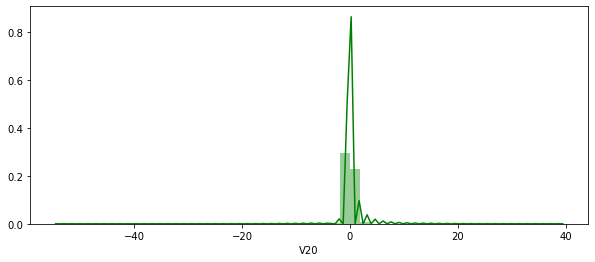

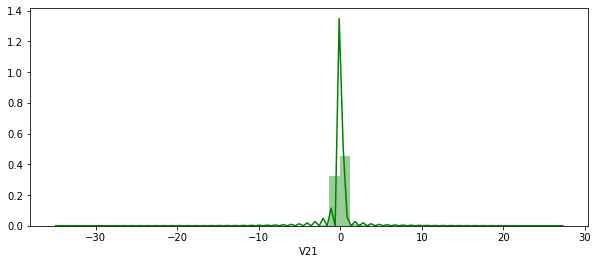

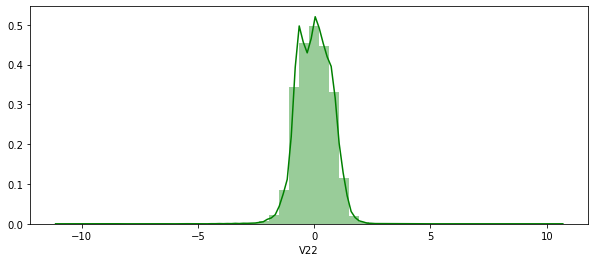

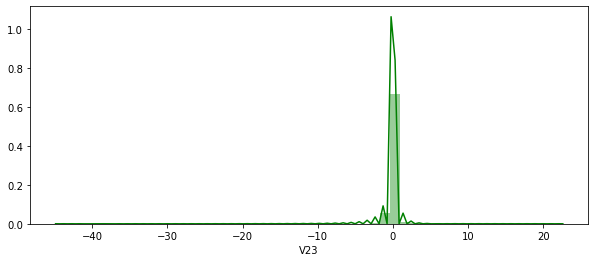

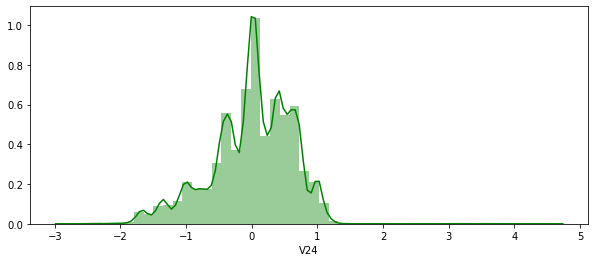

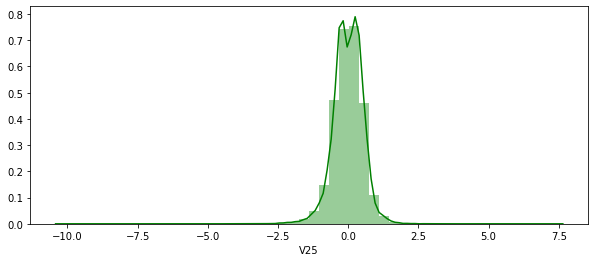

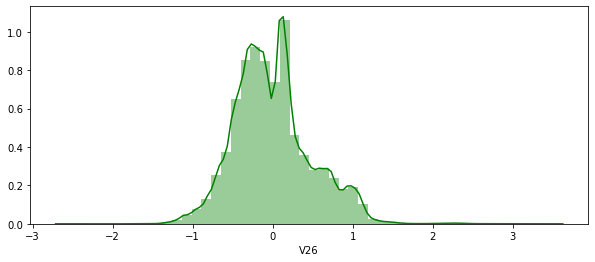

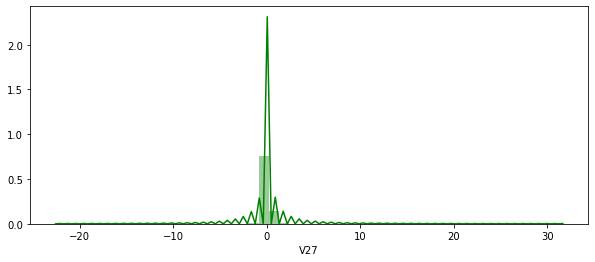

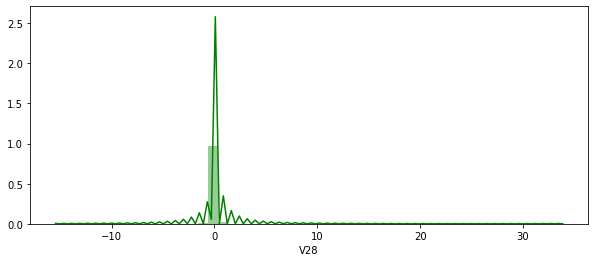

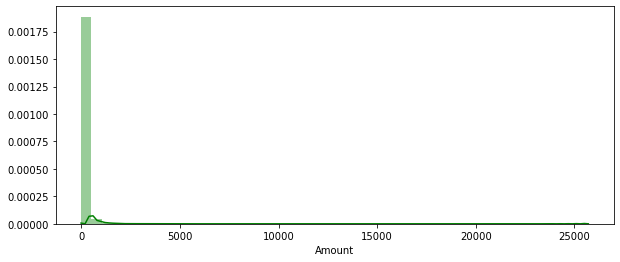

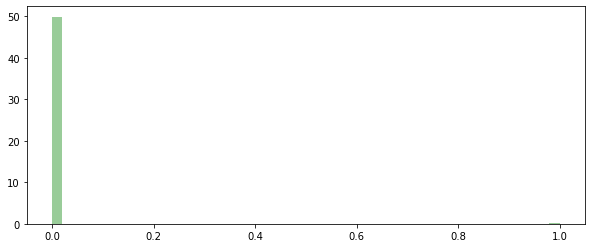

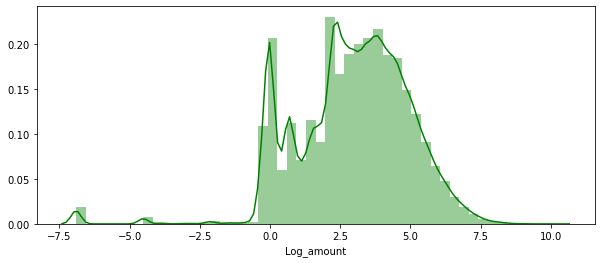

In [9]:
def variable_distribution_analysis(dataset):

        
    numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

    for feature in numerical_features:
        plt.figure(figsize=(10,4))
        try:
            sns.distplot(dataset[feature],color='g')
            plt.show()
        except:
            continue


    #sns.pairplot(dataset,kind="reg")
    #plt.show()
    
variable_distribution_analysis(cleaned_df)

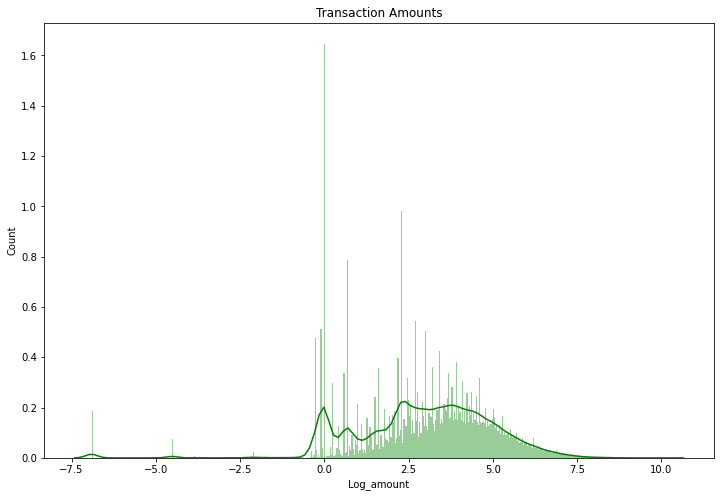

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(cleaned_df['Log_amount'],bins=500,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts');

Observation : 
1. All the PCA variables (V1-V28) are centred at 0,and seem normalized.
2. Amount distribution is also on the lower range, mean = 88 and there are outliers with one transcation of atleast 25,000. 
3. As suspected the numbers of transactions are higher between 10AM-11PM, compared to 1AM to 9AM.
4. The target variable class is highly imbalanced

Lets explore relationship between Amount and time of the hour

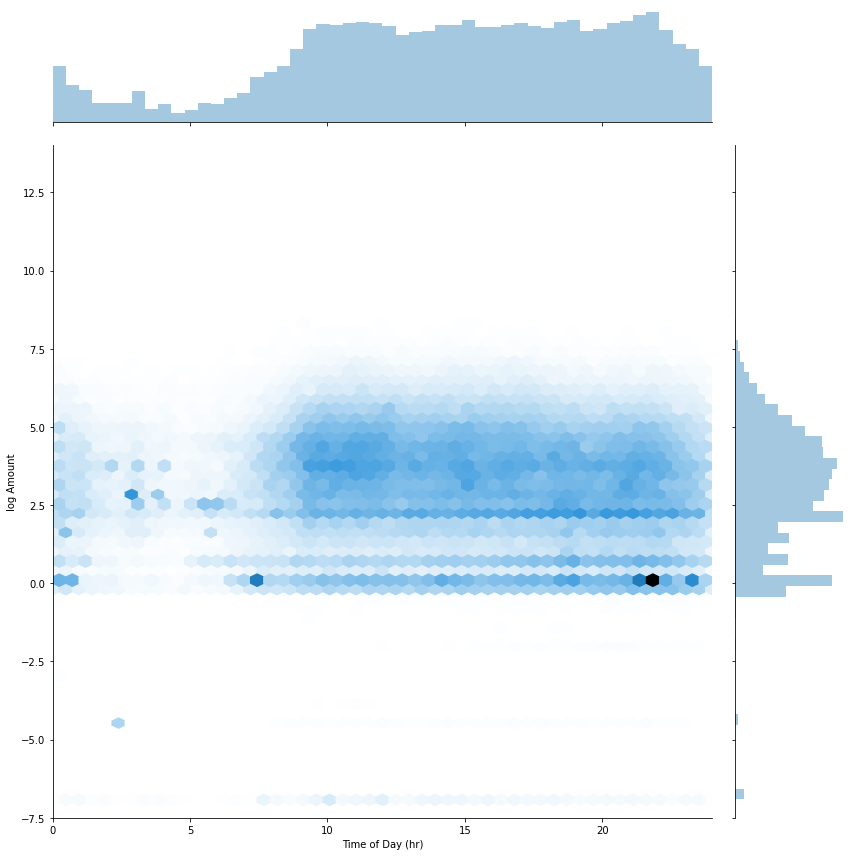

In [11]:
sns.jointplot(cleaned_df['Time'], cleaned_df['Log_amount'], kind='hex', 
              stat_func=None, height=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','log Amount');

**The higher amount transaction are happening in between 9AM to Noon. And then we have surge in number of low amount transaction at around 10 - 11 PM.**

### Outliers Check

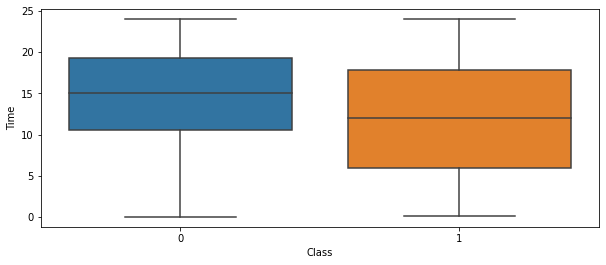

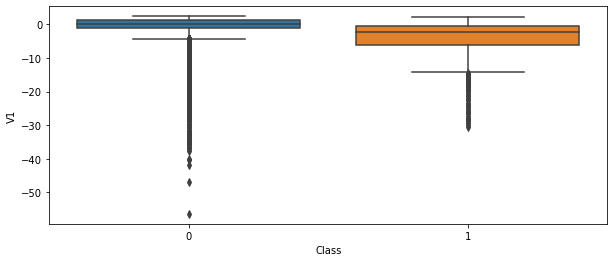

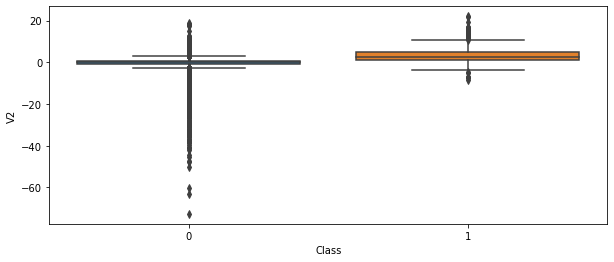

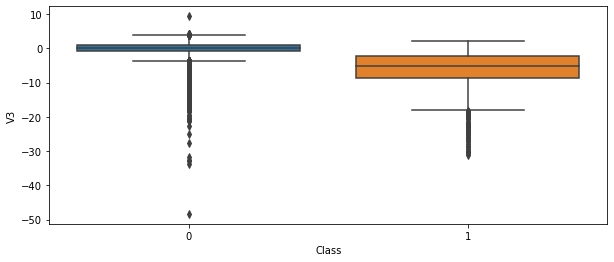

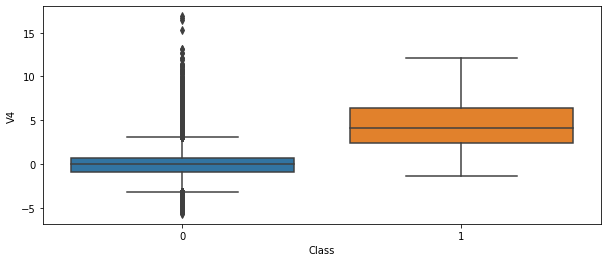

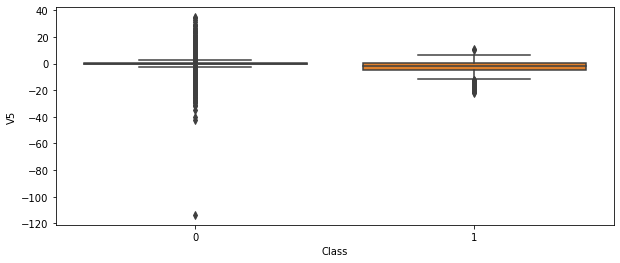

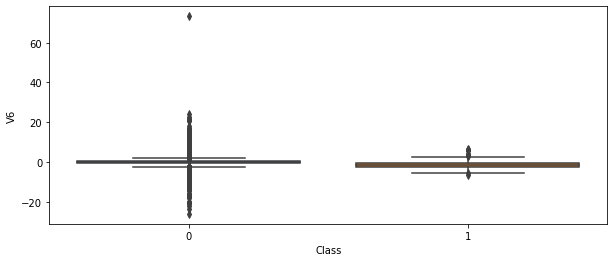

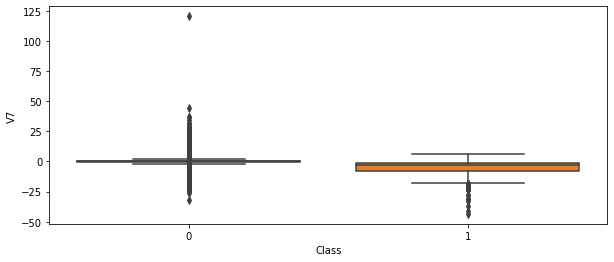

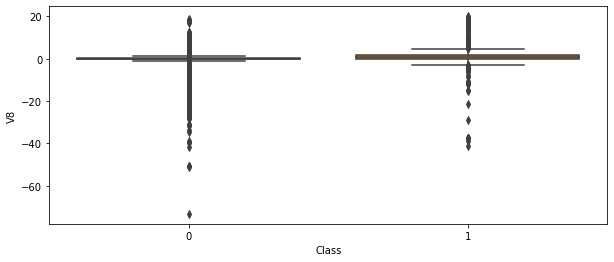

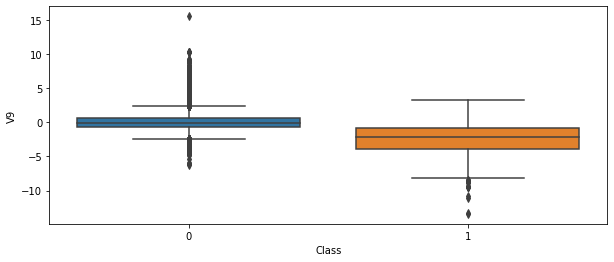

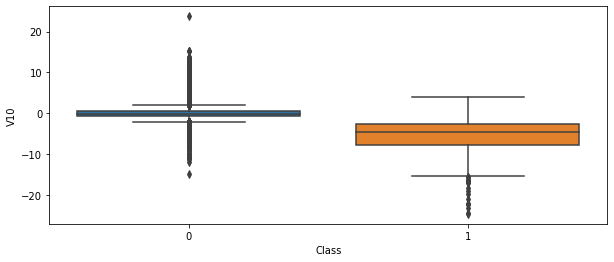

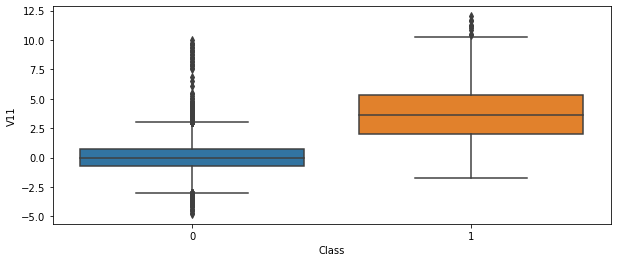

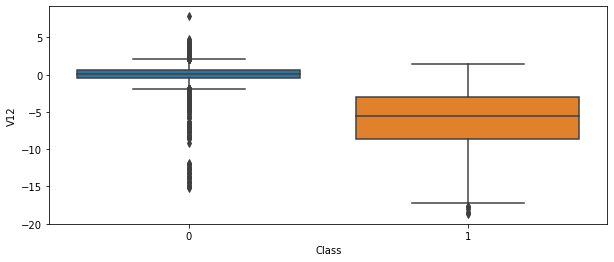

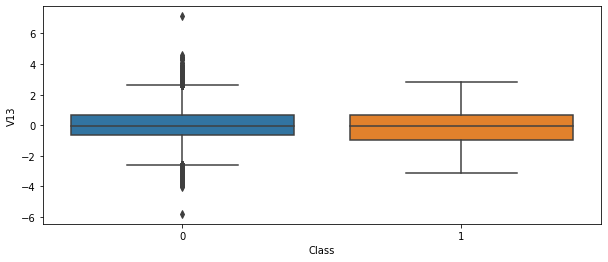

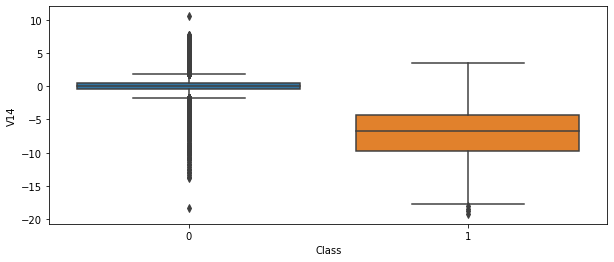

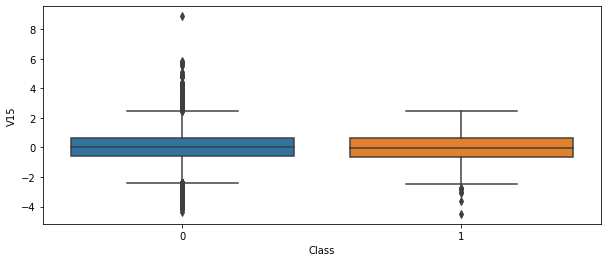

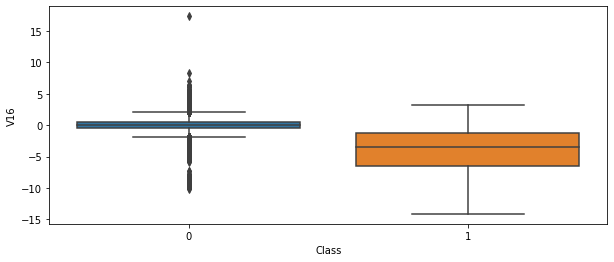

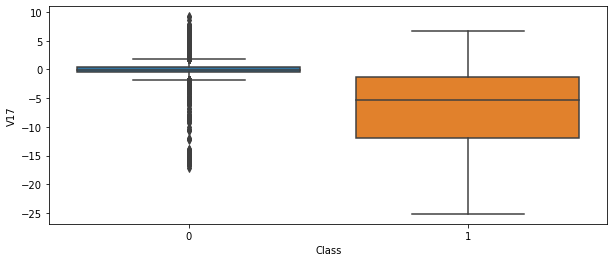

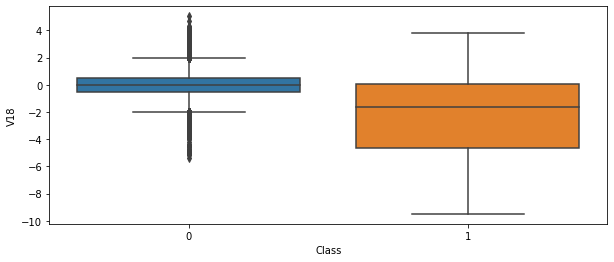

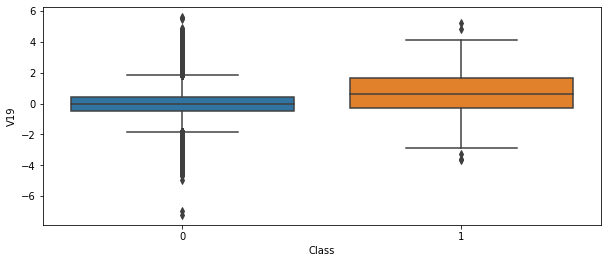

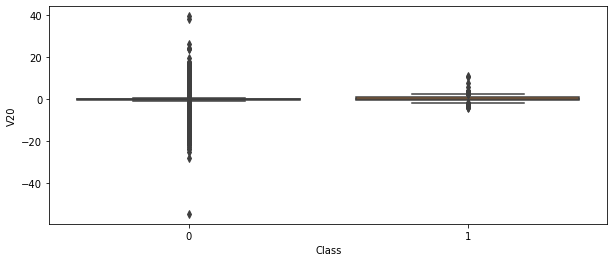

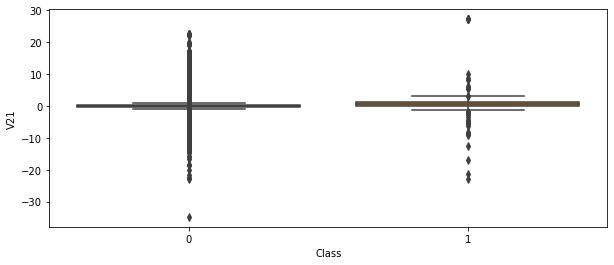

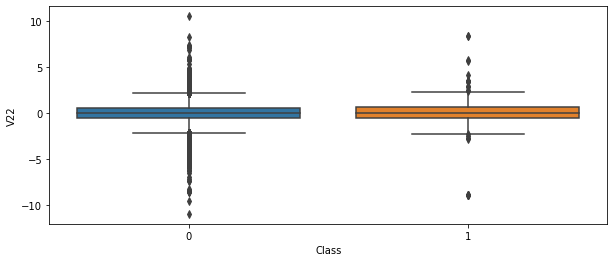

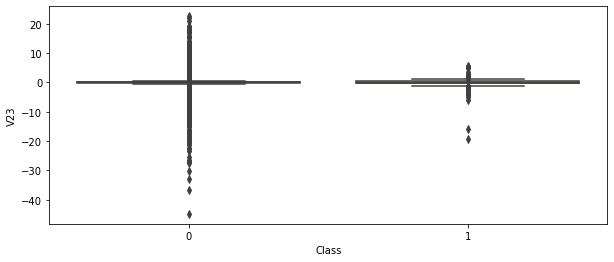

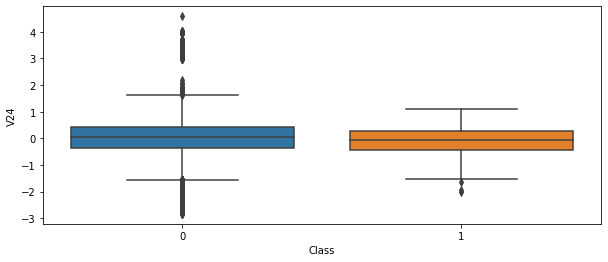

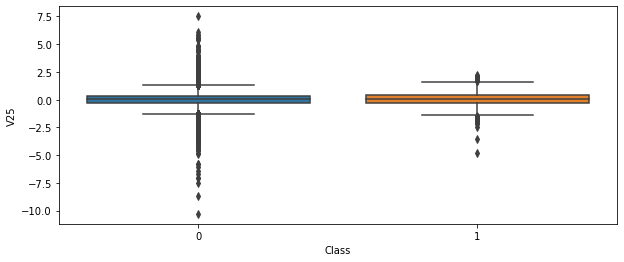

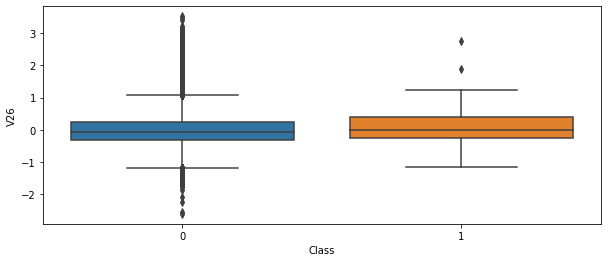

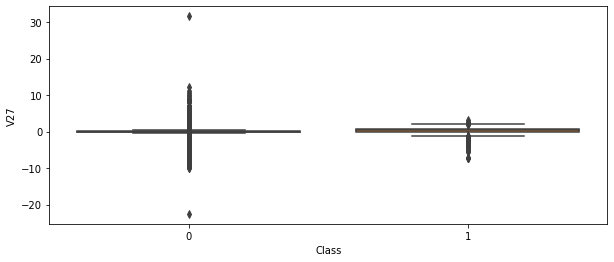

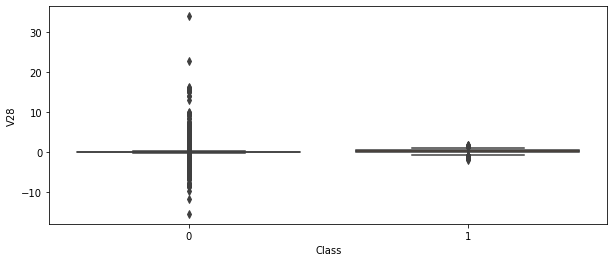

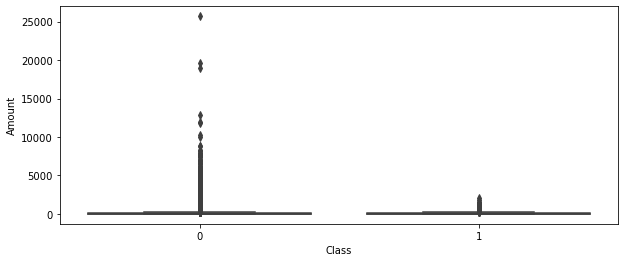

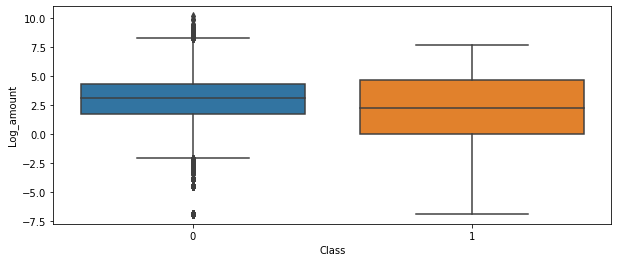

In [12]:
for col in list(cleaned_df.columns):
    if col!='Class':
        plt.figure(figsize=(10,4))
        sns.boxplot(data=cleaned_df,x='Class',y=col)
        plt.show()

Long tail of outliers can be observed for PCA variables. But both classes are behaving differently incase of the outliers 

In [13]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [14]:
cleaned_df[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


Mean of all the PCA variables are approx 0 and standard deviation is between 0 and 2 with mostly a unit value. Let's check the tailedness by ploting Kurtosis distribution

Original dataset is Imbalanced! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud

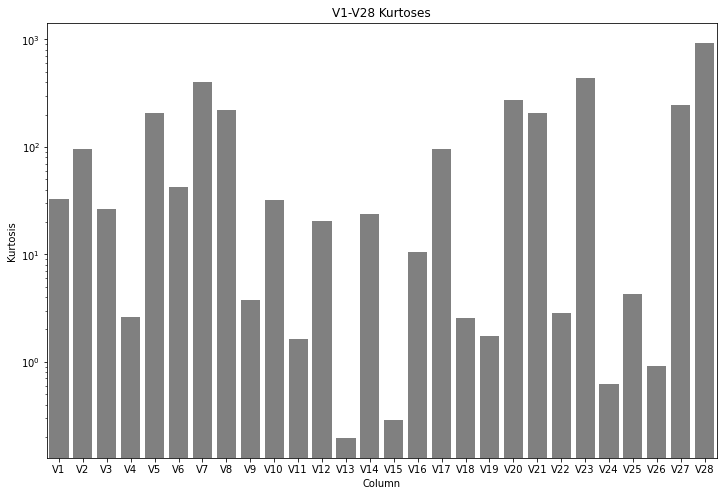

In [15]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=cleaned_df[pca_vars].kurtosis(), color='gray')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses');

As suspected most of the PCA variables have high Kurtosis (>3) values which is also indicated in the box chart above.

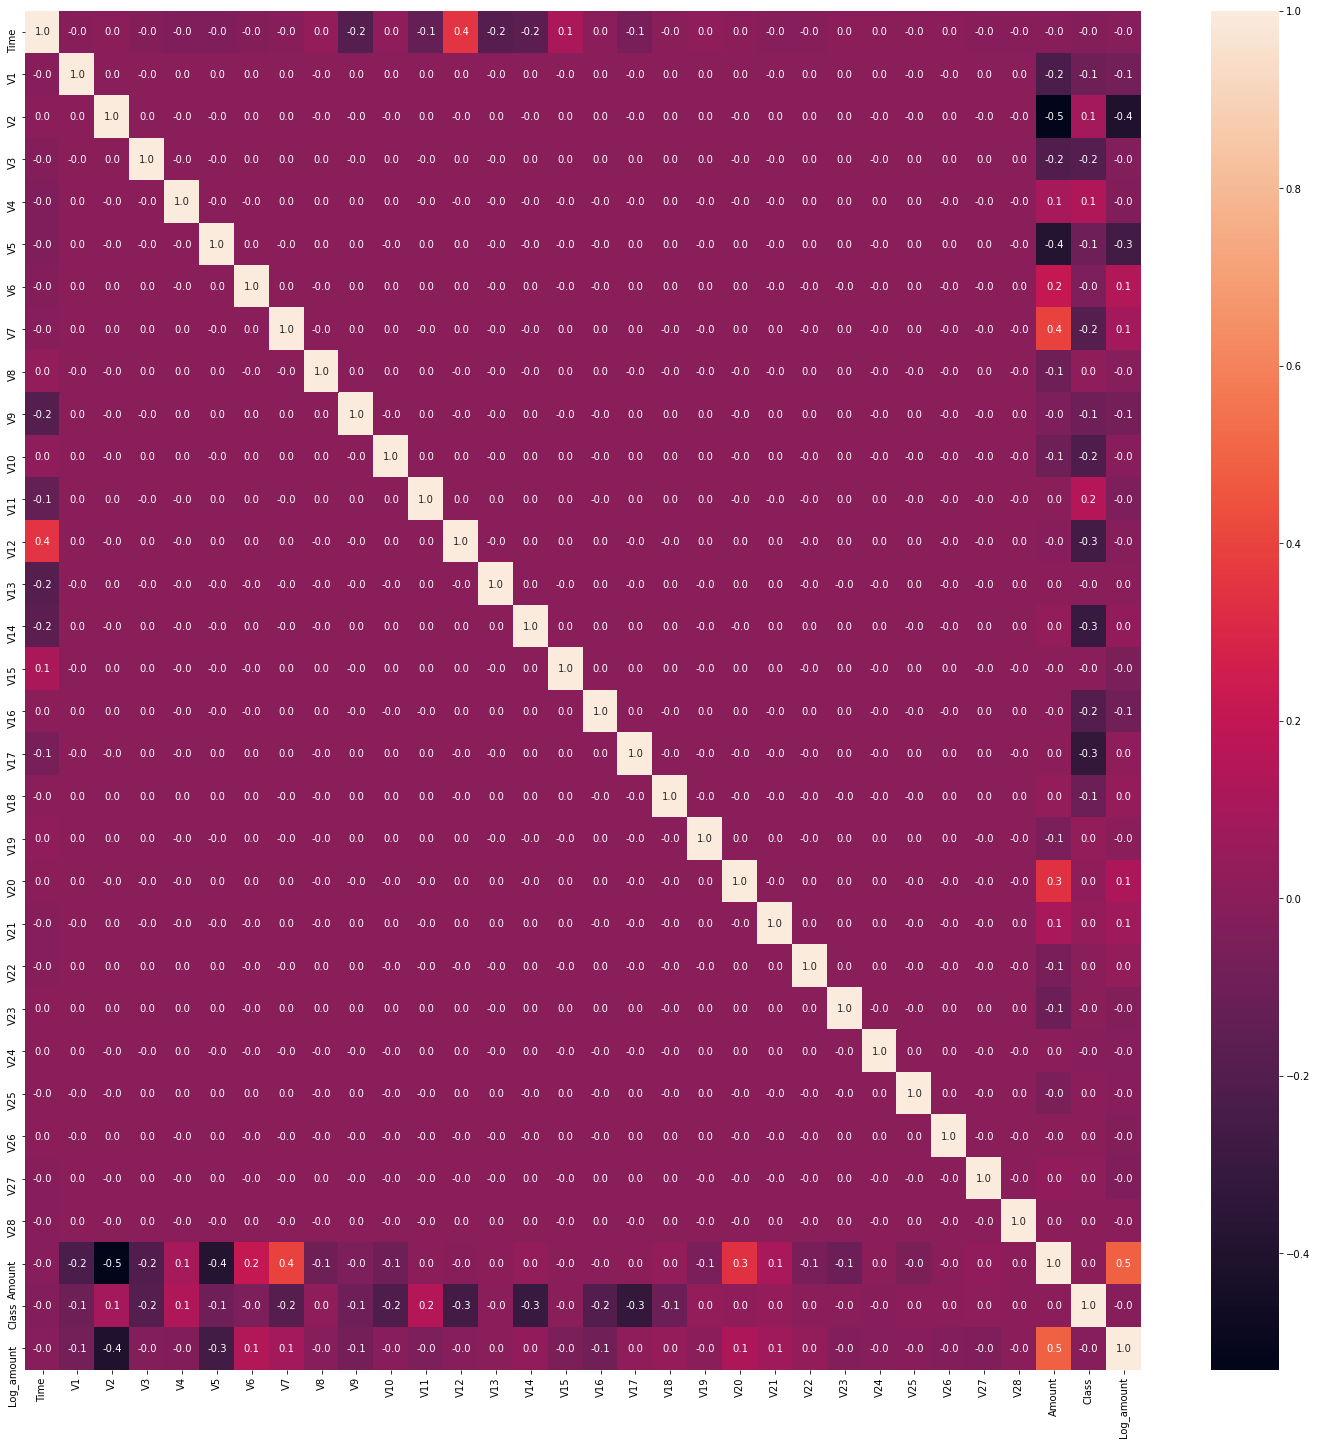

In [16]:
cleaned_df_corr = cleaned_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(data=cleaned_df_corr, annot=True,fmt='.1f');

No feature with high correlation (>7 and <-7) detected.

In [17]:
cleaned_df.groupby(['Class'])['Amount'].agg({'min','max','mean','median','std','count'}).reset_index()

,Class,std,count,max,median,min,mean
0,0,250.105092,284315,25691.16,22.00,0.0,88.291022
1,1,256.683288,492,2125.87,9.25,0.0,122.211321


# Machine learning Algorith
### Using CATBOOST

In [18]:
!pip install catboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [19]:

from imblearn.combine import SMOTETomek

from catboost import CatBoostClassifier

### Balancing the Imbalanced Data

I am using the SMOTETomek method here to balance the dataset. It allows us to combine over- and under-sampling using SMOTE and Tomek links.

In [20]:
y = cleaned_df['Class']
x = cleaned_df.drop(columns='Class', axis=1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
smk = SMOTETomek(random_state = 42)
X_smk, y_smk = smk.fit_sample(X_train, y_train)
X_train = X_smk
y_train = y_smk

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from datetime import datetime
start_time = datetime.now()

clf_model = CatBoostClassifier(n_estimators=1000, learning_rate= 0.0801, 
                               random_seed = 123456, l2_leaf_reg=4, use_best_model=True )
clf_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)])

end_time = datatime.now()
print(f'Duration:{end_time-start_time}')

0:	learn: 0.5181538	test: 0.5181538	test1: 0.5421357	best: 0.5421357 (0)	total: 210ms	remaining: 3m 30s
1:	learn: 0.4030027	test: 0.4030027	test1: 0.4263653	best: 0.4263653 (1)	total: 317ms	remaining: 2m 38s
2:	learn: 0.3235596	test: 0.3235596	test1: 0.3457105	best: 0.3457105 (2)	total: 428ms	remaining: 2m 22s
3:	learn: 0.2659677	test: 0.2659677	test1: 0.2986245	best: 0.2986245 (3)	total: 534ms	remaining: 2m 12s
4:	learn: 0.2254892	test: 0.2254892	test1: 0.2510678	best: 0.2510678 (4)	total: 644ms	remaining: 2m 8s
5:	learn: 0.1976434	test: 0.1976434	test1: 0.2124652	best: 0.2124652 (5)	total: 751ms	remaining: 2m 4s
6:	learn: 0.1717297	test: 0.1717297	test1: 0.1881388	best: 0.1881388 (6)	total: 855ms	remaining: 2m 1s
7:	learn: 0.1560339	test: 0.1560339	test1: 0.1677012	best: 0.1677012 (7)	total: 964ms	remaining: 1m 59s
8:	learn: 0.1433343	test: 0.1433343	test1: 0.1523107	best: 0.1523107 (8)	total: 1.07s	remaining: 1m 57s
9:	learn: 0.1327887	test: 0.1327887	test1: 0.1357737	best: 0.135773

79:	learn: 0.0243753	test: 0.0243753	test1: 0.0245621	best: 0.0245621 (79)	total: 8.86s	remaining: 1m 41s
80:	learn: 0.0239542	test: 0.0239542	test1: 0.0241483	best: 0.0241483 (80)	total: 8.97s	remaining: 1m 41s
81:	learn: 0.0234356	test: 0.0234356	test1: 0.0236355	best: 0.0236355 (81)	total: 9.08s	remaining: 1m 41s
82:	learn: 0.0230367	test: 0.0230367	test1: 0.0233001	best: 0.0233001 (82)	total: 9.18s	remaining: 1m 41s
83:	learn: 0.0227566	test: 0.0227566	test1: 0.0231004	best: 0.0231004 (83)	total: 9.31s	remaining: 1m 41s
84:	learn: 0.0225783	test: 0.0225783	test1: 0.0230224	best: 0.0230224 (84)	total: 9.41s	remaining: 1m 41s
85:	learn: 0.0223003	test: 0.0223003	test1: 0.0228256	best: 0.0228256 (85)	total: 9.52s	remaining: 1m 41s
86:	learn: 0.0220480	test: 0.0220480	test1: 0.0225714	best: 0.0225714 (86)	total: 9.63s	remaining: 1m 41s
87:	learn: 0.0217876	test: 0.0217876	test1: 0.0223557	best: 0.0223557 (87)	total: 9.74s	remaining: 1m 40s
88:	learn: 0.0215026	test: 0.0215026	test1: 0.

156:	learn: 0.0096154	test: 0.0096154	test1: 0.0113234	best: 0.0113234 (156)	total: 17.1s	remaining: 1m 31s
157:	learn: 0.0095424	test: 0.0095424	test1: 0.0112807	best: 0.0112807 (157)	total: 17.2s	remaining: 1m 31s
158:	learn: 0.0094718	test: 0.0094718	test1: 0.0112329	best: 0.0112329 (158)	total: 17.3s	remaining: 1m 31s
159:	learn: 0.0094179	test: 0.0094179	test1: 0.0111881	best: 0.0111881 (159)	total: 17.4s	remaining: 1m 31s
160:	learn: 0.0093304	test: 0.0093304	test1: 0.0111082	best: 0.0111082 (160)	total: 17.5s	remaining: 1m 31s
161:	learn: 0.0092241	test: 0.0092241	test1: 0.0110196	best: 0.0110196 (161)	total: 17.6s	remaining: 1m 31s
162:	learn: 0.0091211	test: 0.0091211	test1: 0.0108943	best: 0.0108943 (162)	total: 17.8s	remaining: 1m 31s
163:	learn: 0.0090123	test: 0.0090123	test1: 0.0107871	best: 0.0107871 (163)	total: 17.9s	remaining: 1m 31s
164:	learn: 0.0089279	test: 0.0089279	test1: 0.0107223	best: 0.0107223 (164)	total: 18s	remaining: 1m 30s
165:	learn: 0.0088758	test: 0.

232:	learn: 0.0056690	test: 0.0056690	test1: 0.0075635	best: 0.0075635 (232)	total: 25.4s	remaining: 1m 23s
233:	learn: 0.0056352	test: 0.0056352	test1: 0.0075256	best: 0.0075256 (233)	total: 25.5s	remaining: 1m 23s
234:	learn: 0.0055837	test: 0.0055837	test1: 0.0074819	best: 0.0074819 (234)	total: 25.6s	remaining: 1m 23s
235:	learn: 0.0055440	test: 0.0055440	test1: 0.0074434	best: 0.0074434 (235)	total: 25.7s	remaining: 1m 23s
236:	learn: 0.0055234	test: 0.0055234	test1: 0.0074158	best: 0.0074158 (236)	total: 25.8s	remaining: 1m 23s
237:	learn: 0.0054675	test: 0.0054675	test1: 0.0073540	best: 0.0073540 (237)	total: 26s	remaining: 1m 23s
238:	learn: 0.0054267	test: 0.0054267	test1: 0.0073072	best: 0.0073072 (238)	total: 26.1s	remaining: 1m 23s
239:	learn: 0.0054020	test: 0.0054020	test1: 0.0072887	best: 0.0072887 (239)	total: 26.2s	remaining: 1m 22s
240:	learn: 0.0053835	test: 0.0053835	test1: 0.0072718	best: 0.0072718 (240)	total: 26.3s	remaining: 1m 22s
241:	learn: 0.0053763	test: 0.

310:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33s	remaining: 1m 13s
311:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.1s	remaining: 1m 13s
312:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.2s	remaining: 1m 12s
313:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.3s	remaining: 1m 12s
314:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.3s	remaining: 1m 12s
315:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.4s	remaining: 1m 12s
316:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.5s	remaining: 1m 12s
317:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.6s	remaining: 1m 12s
318:	learn: 0.0040992	test: 0.0040992	test1: 0.0060159	best: 0.0060159 (281)	total: 33.7s	remaining: 1m 11s
319:	learn: 0.0040992	test: 0.

388:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (388)	total: 39.8s	remaining: 1m 2s
389:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (389)	total: 39.8s	remaining: 1m 2s
390:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (390)	total: 40s	remaining: 1m 2s
391:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (391)	total: 40.1s	remaining: 1m 2s
392:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (392)	total: 40.3s	remaining: 1m 2s
393:	learn: 0.0039703	test: 0.0039703	test1: 0.0058764	best: 0.0058764 (393)	total: 40.4s	remaining: 1m 2s
394:	learn: 0.0039702	test: 0.0039702	test1: 0.0058764	best: 0.0058764 (394)	total: 40.5s	remaining: 1m 2s
395:	learn: 0.0039702	test: 0.0039702	test1: 0.0058764	best: 0.0058764 (395)	total: 40.6s	remaining: 1m 1s
396:	learn: 0.0039702	test: 0.0039702	test1: 0.0058764	best: 0.0058764 (396)	total: 40.7s	remaining: 1m 1s
397:	learn: 0.0039702	test: 0.0039702	t

467:	learn: 0.0039700	test: 0.0039700	test1: 0.0058762	best: 0.0058762 (457)	total: 47.2s	remaining: 53.6s
468:	learn: 0.0039700	test: 0.0039700	test1: 0.0058762	best: 0.0058762 (457)	total: 47.3s	remaining: 53.5s
469:	learn: 0.0039589	test: 0.0039589	test1: 0.0058707	best: 0.0058707 (469)	total: 47.4s	remaining: 53.4s
470:	learn: 0.0039396	test: 0.0039396	test1: 0.0058470	best: 0.0058470 (470)	total: 47.5s	remaining: 53.3s
471:	learn: 0.0039293	test: 0.0039293	test1: 0.0058339	best: 0.0058339 (471)	total: 47.6s	remaining: 53.2s
472:	learn: 0.0039017	test: 0.0039017	test1: 0.0058039	best: 0.0058039 (472)	total: 47.7s	remaining: 53.1s
473:	learn: 0.0038878	test: 0.0038878	test1: 0.0057945	best: 0.0057945 (473)	total: 47.8s	remaining: 53s
474:	learn: 0.0038765	test: 0.0038765	test1: 0.0057837	best: 0.0057837 (474)	total: 47.9s	remaining: 53s
475:	learn: 0.0038765	test: 0.0038765	test1: 0.0057837	best: 0.0057837 (475)	total: 48s	remaining: 52.9s
476:	learn: 0.0038765	test: 0.0038765	test1

546:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (542)	total: 54s	remaining: 44.8s
547:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (547)	total: 54.1s	remaining: 44.6s
548:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (547)	total: 54.2s	remaining: 44.5s
549:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.3s	remaining: 44.4s
550:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.4s	remaining: 44.3s
551:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.5s	remaining: 44.2s
552:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.5s	remaining: 44.1s
553:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.6s	remaining: 44s
554:	learn: 0.0038507	test: 0.0038507	test1: 0.0057634	best: 0.0057634 (549)	total: 54.7s	remaining: 43.9s
555:	learn: 0.0038506	test: 0.0038506	tes

624:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.6s
625:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.5s
626:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.4s
627:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.3s
628:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.2s
629:	learn: 0.0037986	test: 0.0037986	test1: 0.0057139	best: 0.0057139 (614)	total: 1m 1s	remaining: 36.1s
630:	learn: 0.0037986	test: 0.0037986	test1: 0.0057140	best: 0.0057139 (614)	total: 1m 1s	remaining: 36s
631:	learn: 0.0037986	test: 0.0037986	test1: 0.0057140	best: 0.0057139 (614)	total: 1m 1s	remaining: 35.9s
632:	learn: 0.0037986	test: 0.0037986	test1: 0.0057140	best: 0.0057139 (614)	total: 1m 1s	remaining: 35.8s
633:	learn: 0.0037986	test: 0.0037986	t

702:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 7s	remaining: 28.6s
703:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 7s	remaining: 28.5s
704:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 7s	remaining: 28.4s
705:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 7s	remaining: 28.3s
706:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 8s	remaining: 28.2s
707:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 8s	remaining: 28.1s
708:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 8s	remaining: 28s
709:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 8s	remaining: 27.9s
710:	learn: 0.0037897	test: 0.0037897	test1: 0.0057047	best: 0.0057047 (697)	total: 1m 8s	remaining: 27.8s
711:	learn: 0.0037897	test: 0.0037897	t

779:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.9s
780:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.8s
781:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.7s
782:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.6s
783:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.5s
784:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.4s
785:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.3s
786:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.2s
787:	learn: 0.0037892	test: 0.0037892	test1: 0.0057047	best: 0.0057047 (725)	total: 1m 14s	remaining: 20.1s
788:	learn: 0.0037892	test: 

855:	learn: 0.0037374	test: 0.0037374	test1: 0.0056436	best: 0.0056436 (855)	total: 1m 20s	remaining: 13.6s
856:	learn: 0.0037374	test: 0.0037374	test1: 0.0056436	best: 0.0056436 (855)	total: 1m 20s	remaining: 13.5s
857:	learn: 0.0037060	test: 0.0037060	test1: 0.0056093	best: 0.0056093 (857)	total: 1m 20s	remaining: 13.4s
858:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (858)	total: 1m 21s	remaining: 13.3s
859:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (859)	total: 1m 21s	remaining: 13.2s
860:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (860)	total: 1m 21s	remaining: 13.1s
861:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (861)	total: 1m 21s	remaining: 13s
862:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (862)	total: 1m 21s	remaining: 12.9s
863:	learn: 0.0037059	test: 0.0037059	test1: 0.0056093	best: 0.0056093 (863)	total: 1m 21s	remaining: 12.8s
864:	learn: 0.0037059	test: 0.

933:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 6.18s
934:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 6.09s
935:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 5.99s
936:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 5.9s
937:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 5.81s
938:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 27s	remaining: 5.71s
939:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 28s	remaining: 5.62s
940:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 28s	remaining: 5.53s
941:	learn: 0.0036415	test: 0.0036415	test1: 0.0055465	best: 0.0055465 (911)	total: 1m 28s	remaining: 5.44s
942:	learn: 0.0036415	test: 0

NameError: name 'datatime' is not defined

In [28]:
# Confusion Matrix & AUROC
y_pred = clf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("---------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------")
print(roc_auc_score(y_test, y_pred))

NameError: name 'classification_report' is not defined